In the below code I explore taking a Bayesian approach to the opinion polls taken on brexit in the month leading up to the vote. First I explore the polls in which they forced an answer, remain or leave, or inferred the answer of those who were unsure. For example, one poll for the telegraph “Assumes "Don't knows" will break 2:1 in favour of Remain”. This makes out that it will be a home run for remain. 
Following this I then modelled the unsure group as their own class. Then just looking at the remain and leave probabilities brexit became a far more likely outcome.


In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gun to your head Remain/Leave

 [-----------------100%-----------------] 50000 of 50000 complete in 12.6 sec



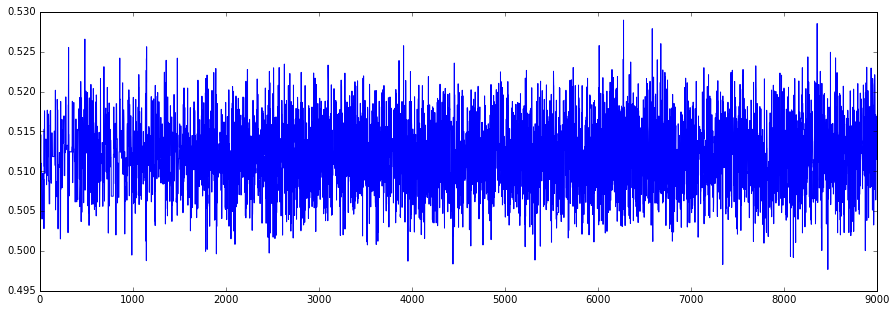



Brexit is 0.998556 likely.


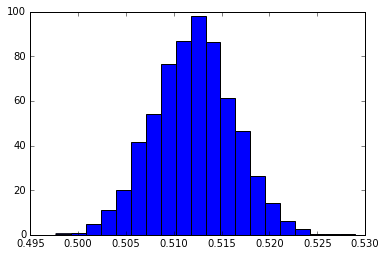

In [2]:
prop_remain = pm.Beta('prop_remain', alpha=1, beta=1)
answers_remain = pm.Bernoulli('answers_remain', p=prop_remain,  value=[1]*7211 + [0]*6871, observed=True)
model_1 = pm.Model([answers_remain, prop_remain])
mcmc_1 = pm.MCMC(model_1)
mcmc_1.sample(iter=50000, burn=5000, thin=5)
print()
print()
plt.subplots(figsize=(15, 5))
plt.plot(mcmc_1.trace("prop_remain")[:])
plt.show()
print()
print()
plt.hist(mcmc_1.trace("prop_remain")[:], bins=20, normed=True);
print("Brexit is %f likely." % (mcmc_1.trace("prop_remain")[:]>0.5).mean())

# Include Unsure Voters
Next include the unsure voters using a uniform Dirichlet prior. The data used are polls in the month before the vote

Polling Data https://en.wikipedia.org/wiki/Opinion_polling_for_the_United_Kingdom_European_Union_membership_referendum

In [3]:
n = np.array([1592, 3011, 2320, 1002, 1652,  800, 1005, 1693, 2007, 1734, 1105,
              1258, 1905, 1000, 2000, 1002, 2498,  800, 1672, 2009, 2000, 2047,
              800, 3405, 2007, 1734, 1005, 2052,  800, 1638, 1013, 1756, 1213,
              2002,  800, 2008, 1648, 1000, 1002])

# Columns [remain, leave, unsure]
k = np.array([[780,732,80],
              [1325,1355,331],
              [951,998,371],
              [451,441,110],
              [694,727,231],
              [424,368,8],
              [452,422,131],
              [745,728,220],
              [883,883,241],
              [728,763,243],
              [464,497,144],
              [541,616,101],
              [743,876,286],
              [450,500,50],
              [880,980,140],
              [461,451,90],
              [999,1174,325],
              [384,392,24],
              [702,719,251],
              [884,844,281],
              [860,840,300],
              [880,983,184],
              [384,376,40],
              [1396,1532,477],
              [863,823,321],
              [711,711,312],
              [422,452,131],
              [903,964,185],
              [408,368,24],
              [721,737,180],
              [446,385,182],
              [720,720,316],
              [497,522,194],
              [901,901,200],
              [440,336,24],
              [884,803,321],
              [725,659,264],
              [520,410,70],
              [551,371,80]])

In [4]:
Dir = pm.Dirichlet('Dir', theta=[1,1,1])
multi = pm.Multinomial('multi', value=k, n=n, p=Dir, observed=True)
model_2 = pm.Model([multi, Dir])
mcmc_2 = pm.MCMC(model_2)
mcmc_2.sample(iter=100000, burn=10000, thin=10)

 [-----------------100%-----------------] 100000 of 100000 complete in 11.3 sec

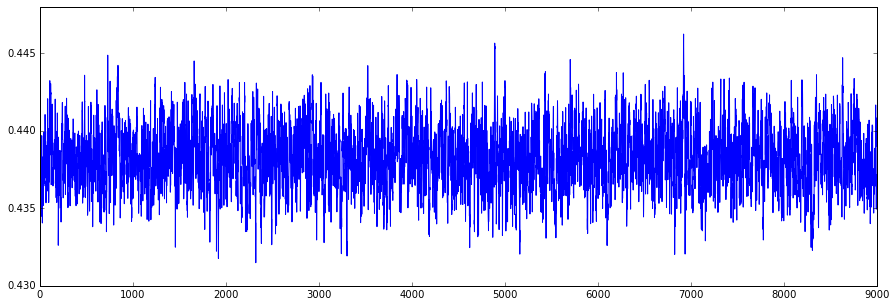

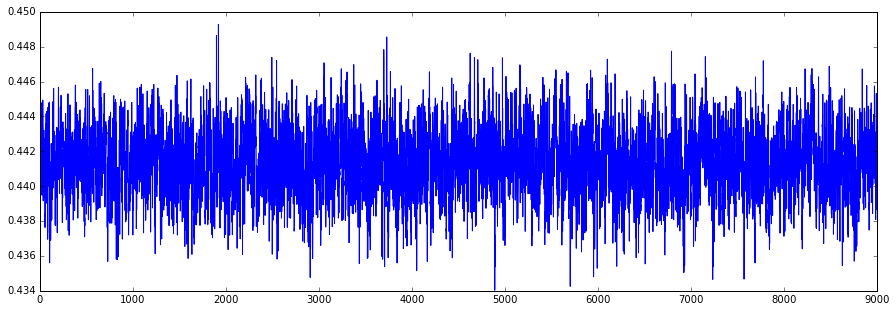

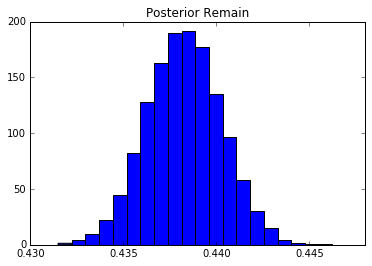

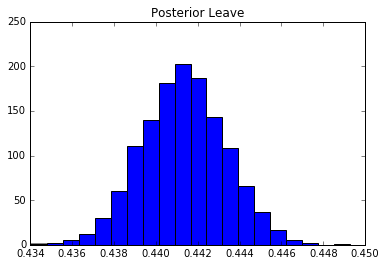

In [5]:
plt.subplots(figsize=(15, 5))
plt.plot(mcmc_2.trace("Dir")[:,0])
plt.show();
plt.subplots(figsize=(15, 5))
plt.plot(mcmc_2.trace("Dir")[:,1])
plt.show();
plt.hist(mcmc_2.trace("Dir")[:,0], bins=20, normed=True)
plt.title("Posterior Remain")
plt.show();
plt.hist(mcmc_2.trace("Dir")[:,1], bins=20, normed=True)
plt.title("Posterior Leave");

In [6]:
print("Probability of Brexit: %f" % (mcmc_2.trace("Dir")[:,1]>mcmc_2.trace("Dir")[:,0]).mean())

Probability of Brexit: 0.789000
